<a href="https://colab.research.google.com/github/MatteoGhizzi/MLPNS2021/blob/main/Lezione6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy as sp
from scipy import stats

##L'obbiettivo è generare set di valori di dimensioni differinti (100, 1000, 10000) da una distribuzione normale e confrontarli tramite il K-S test con la normale standard.

##Il K-S test verrà poi utilizzato per confrontare varie distribuzioni con la distribuzione normale standard

In [ ]:
X = sp.stats.norm.rvs(size=100)
Y = sp.stats.norm.rvs(size=1000)
Z = sp.stats.norm.rvs(size=10000)
df = 1
CHI = sp.stats.chi2.rvs(df, size=1000)

In [ ]:
sp.stats.kstest(X, 'norm')

KstestResult(statistic=0.06782400580542214, pvalue=0.7626232947611578)

In [ ]:
sp.stats.kstest(Y, 'norm')

KstestResult(statistic=0.020536822604793503, pvalue=0.7928931457709346)

In [ ]:
sp.stats.kstest(Z, 'norm')

KstestResult(statistic=0.010530372837556146, pvalue=0.21742128531776203)

In [ ]:
sp.stats.kstest(CHI, 'norm')


KstestResult(statistic=0.5000009011624119, pvalue=1.0623315523337076e-231)

#statistic is the maximum distance between the 2 comulative distribution
# p value must be << than my thresh
# ripsonde alla domanda : provengono dalla stessa distribuzione ??

In [ ]:
 sp.stats.ks_2samp(X,Y)

Ks_2sampResult(statistic=0.065, pvalue=0.8177791664689186)

## PARTE 2 

#riproduzione articolo earthquakes

In [33]:
#all the imports I needed
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


In [34]:
# IMPORTIAMO I DATI dal raw file presente su Github
data = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLPNS2021/main/NHRT/earthquakes.csv',sep=' ')

In [35]:
data.describe


<bound method NDFrame.describe of        #YYY/MM/DD  HH:mm:SS.ss  ET  GT  ... Unnamed: 30  Unnamed: 31 NPH  NGRM
0      1984/01/01  01:30:57.52  eq NaN  ...         NaN          NaN NaN   NaN
1      1984/01/01  05:31:34.16  eq NaN  ...         NaN          NaN NaN   NaN
2      1984/01/01  06:59:05.14  eq NaN  ...         NaN          NaN NaN   NaN
3      1984/01/01  11:10:25.29  eq NaN  ...         NaN          NaN NaN   NaN
4      1984/01/01  19:38:19.79  eq NaN  ...         NaN          NaN NaN   NaN
...           ...          ...  ..  ..  ...         ...          ...  ..   ...
70793  2002/12/29  19:37:24.56  eq NaN  ...         NaN          NaN NaN   NaN
70794  2002/12/29  20:17:33.40  eq NaN  ...         NaN          NaN NaN   NaN
70795  2002/12/29  20:21:28.73  eq NaN  ...         NaN          NaN NaN   NaN
70796  2002/12/30  21:51:52.55  eq NaN  ...         NaN          NaN NaN   NaN
70797  2002/12/30  23:38:49.79  eq NaN  ...         NaN          NaN NaN   NaN

[70798 rows x 34 

In [36]:
# cambiamo nome ai dati e visualizziamo quelli che ci interessano
eqdata = data.rename({'#YYY/MM/DD':'date','HH:mm:SS.ss':'time','Unnamed: 5':'mag'},axis=1)[['date','time','mag']]
eqdata.head()


,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [37]:
# devo convertire in uno tipo di file più utilizzabile  e unire queste due colonne in una unica
eqdata.time.dtype, eqdata.date.dtype


(dtype('O'), dtype('O'))

In [38]:
#delete
#fixing time which ends with 60.00 sec
for i in range(len(eqdata)):            # faccio passare tutte le righe della colonna time
    if eqdata.iloc[i].time.endswith('60.00'):   # se per ogni riga iloc(i) la colonna time di data finisce per 60.00
        print(eqdata.iloc[i].time[:6] + "59.99") # stampa dal sesto numero 
        #compreso e poi stampa a fianco 59.99.
        eqdata["time"][i] = eqdata.iloc[i].time[:6] + "59.99"  # qui eseguo la sostituzione
        print (eqdata.iloc[i].time)


04:48:59.99
04:48:59.99
14:19:59.99
14:19:59.99


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


21:48:59.99
21:48:59.99
15:34:59.99
15:34:59.99
06:41:59.99
06:41:59.99


In [39]:
# questo comando crea una nuova colonna  che è l'unione della colonna data e 
#time e le converte in time per pandas
#usiamo al posto del for loop classico un comando compreso nella lista
eqdata['datetime'] = pd.to_datetime([eqdata.iloc[i].date + " " + 
                            eqdata.iloc[i].time for i in range(len(eqdata))])

In [40]:
eqdata.head()

,date,time,mag,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


#a me servirebbero gli intervalli tmeporali

In [41]:
# first I create the timetamps pairs for the beginning and end of the valid periods. 
# I do it with a for loop that appends pairs of timestamps to a list that I create at the beginning
# create empty container
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5), 
          (1990.3, 1992.1), 
          (1994.6, 1995.6),
          (1996.1,1996.5), 
          (1997,1997.6), 
          (1997.75,1998.15), 
          (1998.25,1999.35), 
          (2000.55,2000.8),
          (2000.9 ,2001.25), 
          (2001.6 ,2002), 
          (2002.5 ,2003)]:
    
    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime. 
    ss.append((pd.to_datetime(int(t[0]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),  # prendo gli elementi e faccio la differenza
               pd.to_datetime(int(t[1]), format="%Y")   # ottengo un valore in frazione di anni allora molptipllico per 365.25 per ottenere il valore in giorni ecc
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))

In [42]:
ss

[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-03 00:00:00')),
 (Timestamp('1990-04-21 00:00:00'), Timestamp('1992-02-07 00:00:00')),
 (Timestamp('1994-08-08 00:00:00'), Timestamp('1995-08-08 00:00:00')),
 (Timestamp('1996-02-07 00:00:00'), Timestamp('1996-07-02 00:00:00')),
 (Timestamp('1997-01-01 00:00:00'), Timestamp('1997-08-08 00:00:00')),
 (Timestamp('1997-10-02 00:00:00'), Timestamp('1998-02-25 00:00:00')),
 (Timestamp('1998-04-02 00:00:00'), Timestamp('1999-05-09 00:00:00')),
 (Timestamp('2000-07-20 00:00:00'), Timestamp('2000-10-19 00:00:00')),
 (Timestamp('2000-11-25 00:00:00'), Timestamp('2001-04-02 00:00:00')),
 (Timestamp('2001-08-08 00:00:00'), Timestamp('2002-01-01 00:00:00')),
 (Timestamp('2002-07-03 00:00:00'), Timestamp('2003-01-01 00:00:00'))]

In [43]:
# l'articolo mi dice di prendere solo terremoti per mag > 2
# devo fare un BROADCASTING  IMPORTANTE
print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))

the 11 timestamp pairs that are the boundaries of good data periods are:


In [44]:
# data between start and end of first time period
# è comunque un broadcasting ma su dataframe, brutto ma efficace 
#mi va a 
gooddates = (((eqdata.datetime >= ss[0][0]) * (eqdata.datetime <= ss[0][1])) +\
        # data between start and end of second time period
        ((eqdata.datetime >=ss [1][0]) * (eqdata.datetime <= ss[1][1])) +\
        ((eqdata.datetime >=ss [2][0]) * (eqdata.datetime <= ss[2][1])) +\
        ((eqdata.datetime >=ss [3][0]) * (eqdata.datetime <= ss[3][1])) +\
        ((eqdata.datetime >=ss [4][0]) * (eqdata.datetime <= ss[4][1])) +\
        ((eqdata.datetime >=ss [5][0]) * (eqdata.datetime <= ss[5][1])) +\
        ((eqdata.datetime >=ss [6][0]) * (eqdata.datetime <= ss[6][1])) +\
        ((eqdata.datetime >=ss [7][0]) * (eqdata.datetime <= ss[7][1])) +\
        ((eqdata.datetime >=ss [8][0]) * (eqdata.datetime <= ss[8][1])) +\
        ((eqdata.datetime >=ss [9][0]) * (eqdata.datetime <= ss[9][1])) +\
        # data between start and end of last time period
        ((eqdata.datetime >=ss [10][0]) * (eqdata.datetime <= ss[10][1])\
        ).values)

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [45]:
# broadcasting to create a dataframe with the good dates only
eqGoodData = eqdata[gooddates]
eqGoodData.shape


(18852, 4)

In [46]:
#faccio il broadcasting, mi servono mag >= 2

eqGoodData = eqGoodData[eqGoodData.mag >= 2.0]
eqGoodData.shape

(18852, 4)

In [47]:
# devo aggiungere una colonna che raccolga i time interval tra ogni terremoto
eqGoodData['gaps'] = eqGoodData.datetime.diff().values.astype(float)
eqGoodData.shape

(18852, 5)

In [48]:
eqGoodData.head()

,date,time,mag,datetime,gaps
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520,-9.223372e+18
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,1.443664e+13
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,3.047450e+13


In [49]:
# la rpima linea non va bene, RIMUOVIAMOLA
# non ha senso la differenza di zero con il precedente
#remove the first row
eqGoodData = eqGoodData.iloc[1:]

In [50]:
eqGoodData.head()

,date,time,mag,datetime,gaps
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,1.443664e+13
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,3.047450e+13
5,1984/01/01,19:39:19.67,2.13,1984-01-01 19:39:19.670,5.988000e+10


##DATA EXPLORATION

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


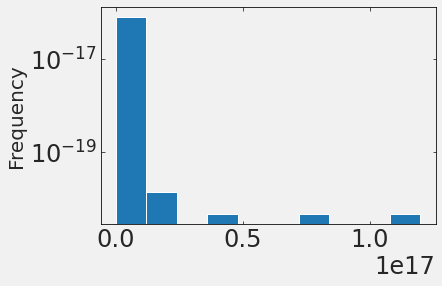

In [51]:
eqGoodData.gaps.plot(kind='hist', density=1, log=True)

è evidente la presenza di OUTLAYERS

vanno rimossi se non hanno utilità o non sono rilevanti, come in questo caso...

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

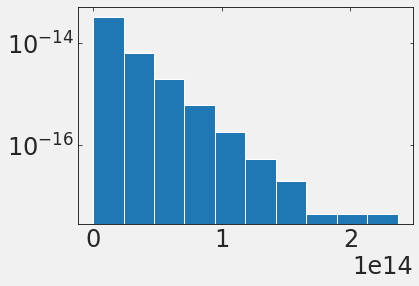

In [52]:
monthgap = 2.628e+15

eqGoodData = eqGoodData[eqGoodData.gaps < monthgap]
pl.hist(eqGoodData.gaps.astype(float),  density=1, log=True);

In [53]:
#fissiamo il threshold

alpha = 0.003

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


original data size: 18840
removing time gaps that are too long. new size: 18837
mean unrescaled time gap 19250664939215.375
removing time gaps too small, first pass: new size 17850
mean unrescaled time gap 1.055
removing time gaps too small, second pass: new size 17821
mean unrescaled time gap 1.002
  
original data size: 5719
removing time gaps that are too long. new size: 5716
mean unrescaled time gap 63383511726731.977
removing time gaps too small, first pass: new size 5339
mean unrescaled time gap 1.070
removing time gaps too small, second pass: new size 5319
mean unrescaled time gap 1.004
  
original data size: 1463
removing time gaps that are too long. new size: 1460
mean unrescaled time gap 247595145239726.031
removing time gaps too small, first pass: new size 1322
mean unrescaled time gap 1.104
removing time gaps too small, second pass: new size 1318
mean unrescaled time gap 1.003
  
original data size: 428
removing time gaps that are too long. new size: 425
mean unrescaled tim

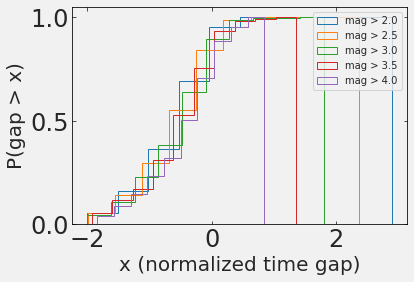

In [54]:
def rescale(df, threshold=0.01):
    times = [] # container for all arrays of rescaled time gaps (for 5 magnitude thresholds)
    hss = [] # container for heights of histograms
    binss = [] # container for bins of histograms

    for m in [2, 2.5, 3, 3.5, 4]:
        #select magnitude and convert to floating point numbers
        tmp = df['datetime'][df.mag >= m].diff().values[1:].astype(float)
        print("original data size:", len(tmp))
    
        tmp = tmp[tmp < 3e16]
        print("removing time gaps that are too long. new size:", len(tmp))
   
        rs = tmp.mean()
        print("mean unrescaled time gap {:.3f}".format(rs))
        tmp = tmp[tmp / rs >= threshold] / rs
        print("removing time gaps too small, first pass: new size", len(tmp))
   
        rs = tmp.mean()
        print("mean unrescaled time gap {:.3f}".format(rs))
        tmp = tmp[tmp / rs >= threshold] / rs
        print("removing time gaps too small, second pass: new size", len(tmp))
 
        rs = tmp.mean()
        print("mean unrescaled time gap {:.3f}".format(rs))
    
        tmp = tmp / rs
        print("  ")
    
        times.append(np.log10(tmp))
    
        #calculate the histogram of the last array of times (the one that you just calculated)
        hs, bins, patch= pl.hist(times[-1], 
                             cumulative=True, density=1, histtype="step", label="mag > %.1f"%m)
        hss.append(hs)
        binss.append(bins)

    pl.legend(fontsize=10)
    pl.xlabel("x (normalized time gap)")
    pl.ylabel("P(gap > x)")
    return binss, hss, times
  
binss, hss, times = rescale(eqGoodData, threshold=0.01)

0 1 17821 Ks_2sampResult(statistic=0.018537998442217984, pvalue=0.11972473350517529)
0 2 17821 Ks_2sampResult(statistic=0.022027132232786295, pvalue=0.590871482948529)
0 3 17821 Ks_2sampResult(statistic=0.0307770949792755, pvalue=0.8784389051047148)
0 4 17821 Ks_2sampResult(statistic=0.08637894749458336, pvalue=0.42942504359992983)
1 2 5319 Ks_2sampResult(statistic=0.029803826919900342, pvalue=1.0)
1 3 5319 Ks_2sampResult(statistic=0.03885978326109708, pvalue=0.6513691780352857)
1 4 5319 Ks_2sampResult(statistic=0.10036743164730942, pvalue=0.24351890767478512)
2 3 1318 Ks_2sampResult(statistic=0.04470799217742001, pvalue=0.5862742653986428)
2 4 1318 Ks_2sampResult(statistic=0.07794245473429881, pvalue=0.57802209524943)
3 4 374 Ks_2sampResult(statistic=0.09111676444629044, pvalue=0.4807578120256528)


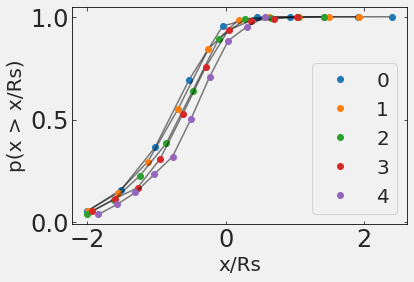

In [55]:
for i in range(5):
    pl.plot(binss[i][:-1], hss[i], 'k-',  alpha=0.5)
    pl.plot(binss[i][:-1], hss[i], 'o', label="%d"%i)
    for j in range(i+1,5):
        print(i,j, len(times[i]), sp.stats.ks_2samp(times[i], times[j]))
#QUESTA ERA LA PARTE DI DATA ANALYSIS
pl.legend()
pl.xlabel("x/Rs")
pl.ylabel("p(x > x/Rs)");